In [1]:
import nltk
import csv
import re
import pickle
import string
from sklearn.pipeline import Pipeline
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#opening the tsv files and placing them into variable
# https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29
# drugtest_raw = open("C:\\Users\\Lenovo\\ictds\\0 tcs ion classification\\tcsion-classificaton\\drugLibTest_raw.tsv")
# drugtrain_raw = open("C:\\Users\\Lenovo\\ictds\\0 tcs ion classification\\tcsion-classificaton\\drugLibTrain_raw.tsv")

In [3]:
drugTestFrame = pd.read_csv('drugLibTest_raw.tsv', sep = '\t')
drugTrainFrame = pd.read_csv('drugLibTrain_raw.tsv', sep = '\t')

In [4]:
df = pd.concat([drugTestFrame, drugTrainFrame])
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [5]:
df = df.drop(['Unnamed: 0'], axis = 1)


In [6]:
df.describe()

,rating
count,4143.000000
mean,6.946416
std,2.948868
min,1.000000
25%,5.000000
50%,8.000000
75%,9.000000
max,10.000000


In [7]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64

In [10]:
df = df[['rating', 'urlDrugName', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']]

In [11]:

# checking if there are null values in the data
print("congrats you are safe there is no null values :")
print(df.isna().sum())

congrats you are safe there is no null values :
rating               0
urlDrugName          0
effectiveness        0
sideEffects          0
condition            0
benefitsReview       0
sideEffectsReview    0
commentsReview       0
dtype: int64


In [12]:
# df['combinedReview'].head(1)
df.head()

,rating,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,9,biaxin,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,9,lamictal,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,4,depakene,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,10,sarafem,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,10,accutane,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


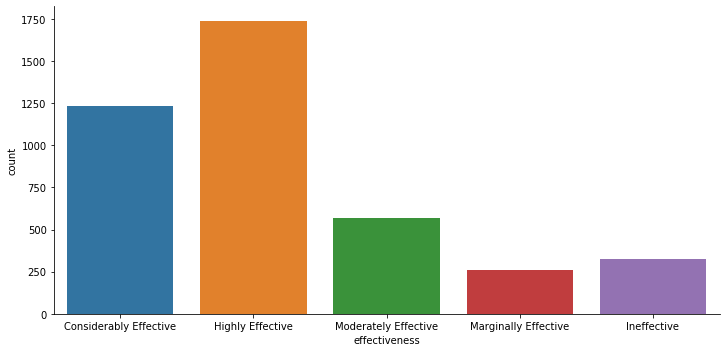

In [13]:
sns.catplot(x= 'effectiveness',data=df,kind='count', height=5, aspect=2)


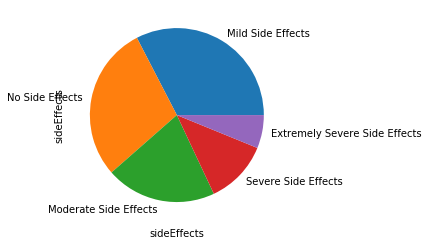

In [14]:
df['sideEffects'].value_counts().plot(kind='pie')
plt.xlabel('sideEffects')
plt.show()

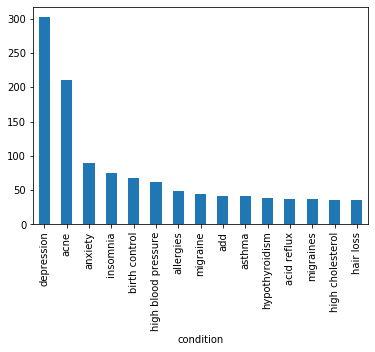

In [15]:
df['condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('condition')
plt.show()

In [16]:
# # target = df2.pop('sideEffects')
# # df = df.drop(['urlDrugName', 'effectiveness', 'condition','sideEffects','benefitsReview', 'sideEffectsReview','commentsReview'],axis = 1)
# df2 = df[['urlDrugName', 'effectiveness', 'condition','rating', 'combinedReview']]


In [17]:
#lets convert categorical to numerical
df2= df.copy()
# cols = ['urlDrugName', 'effectiveness', 'condition','rating','sideEffects','condition','benefitsReview','sideEffectsReview','commentsReview']
for x in df2:
  df2[x] = pd.factorize(df2[x])[0]
# target = pd.factorize(target)[0]
df2.head()


,rating,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,1,1
2,1,2,2,1,1,2,2,2
3,2,3,1,2,2,3,3,3
4,2,4,1,0,3,4,4,4


In [18]:
# sns.pairplot(data=df2, kind='scatter', diag_kind='kde')

In [19]:
# corrmatrix = df2.corr()
# plt.subplots(figsize=(20,8))
# sns.heatmap(corrmatrix, vmin=-.7,vmax=0.7,annot=True,linewidth=0.2)
# #so concluding dataset have no highly or less correlated value so deriving the model based on the review

In [20]:
df.head()
df['combinedReview'] = df[['benefitsReview', 'sideEffectsReview', 'commentsReview']].agg(' '.join, axis=1)


# preprocessing

In [21]:
#preprocessing
#replace commas with space
df['combinedReview'] = df['combinedReview'].str.replace(',', ' ')

# Removing prefixed 'b'
df['combinedReview'] = df['combinedReview'].str.replace(r'^b\s+', ' ')

# Converting to Lowercase
df['combinedReview'] = df['combinedReview'].str.lower()

# remove numbers
df['combinedReview'] = df['combinedReview'].str.replace(r' \d+', ' ')

# Substituting multiple spaces with single space
df['combinedReview'] = df['combinedReview'].str.replace(r'\s+', ' ')

# remove all single characters
df['combinedReview'] = df['combinedReview'].str.replace(r'\s+[a-zA-Z]\s+', ' ')


In [22]:
#  nltk.download()

In [23]:

#Stemming words into fewer letter words
stemmer = WordNetLemmatizer()
df['combinedReview'] = [stemmer.lemmatize(word) for word in df['combinedReview']]

In [24]:
# # Function for extracting ONLY NOUNS AND VERBS
# # Getting nouns and verbs
# def get_adjectives(text):
#     blob = TextBlob(text)
#     return [word for (word, tag) in blob.tags if tag == 'NN' or tag == 'VB']

# df['combinedReview'] = df['combinedReview'].apply(get_adjectives)

# # Function for converting LIST TO STRINGS
# # Reducing List to Strings
# def listToString(s):
#     str1 = ""

#     for ele in s:
#         str1 += " " + ele

#     return str1

# df['combinedReview'] = df['combinedReview'].apply(listToString)

In [25]:
# sns.pairplot(data=df, kind='scatter', diag_kind='kde')
# corrmatrix = data.corr()
# correlation_mat = df.corr()
# sns.heatmap(correlation_mat, annot = True)
# plt.show()

In [26]:
#Label Encoding y values (Side Effects)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sideEffects'])

In [27]:
#Encoding the X features
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df[['combinedReview']])

In [28]:
stop_words = set(stopwords.words('english'))

In [29]:
#For sentences
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvectorizer = TfidfVectorizer(max_features=2500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidvectorizer.fit(df['combinedReview'])
X = tfidvectorizer.fit_transform(df['combinedReview'])

# test train split 

In [31]:
# #Test Splits
from sklearn.model_selection import train_test_split
#not getting that much of a accuracy when combined review done with other feature like rating, urldrugname, conditions
# X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Random Forest Classifier

In [32]:

from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators=1000, random_state=0,max_depth = 15,min_samples_split = 5, min_samples_leaf = 1)
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [33]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("RandomForest Classifier Accuracy:", accuracy_score(y_test, y_pred))

RandomForest Classifier Accuracy: 0.5227492739593417


In [34]:
# THIS IS THE FPR VALUES and report
#######################################
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
######################################

[[  1  31   7  21   7]
 [  0 284   6  52   1]
 [  0 151  12  39   2]
 [  0  74   2 225   0]
 [  0  62  10  28  18]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.47      0.83      0.60       343
           2       0.32      0.06      0.10       204
           3       0.62      0.75      0.68       301
           4       0.64      0.15      0.25       118

    accuracy                           0.52      1033
   macro avg       0.61      0.36      0.33      1033
weighted avg       0.54      0.52      0.45      1033



# Naive bayes

In [35]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Bernoulli NB Accuracy: ", accuracy_score(y_test, y_pred))

Bernoulli NB Accuracy:  0.4830590513068732


In [36]:

# THIS IS THE FPR VALUES and report
#######################################
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
#######################################

[[ 19   4   5  15  24]
 [ 11 163  42 113  14]
 [  7  75  51  55  16]
 [  4  47  12 228  10]
 [  7  17  28  28  38]]
              precision    recall  f1-score   support

           0       0.40      0.28      0.33        67
           1       0.53      0.48      0.50       343
           2       0.37      0.25      0.30       204
           3       0.52      0.76      0.62       301
           4       0.37      0.32      0.35       118

    accuracy                           0.48      1033
   macro avg       0.44      0.42      0.42      1033
weighted avg       0.47      0.48      0.47      1033



# svm

In [37]:
# using svm
from sklearn.svm import SVC
svm_clf = SVC().fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
print("SVM accuracy is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, svm_pred))

SVM accuracy is  0.4830590513068732
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.45      0.77      0.57       343
           2       0.36      0.16      0.22       204
           3       0.62      0.68      0.65       301
           4       0.53      0.14      0.22       118

    accuracy                           0.50      1033
   macro avg       0.59      0.35      0.34      1033
weighted avg       0.53      0.50      0.45      1033



#  KNN REGRESSION¶

In [47]:
#knn instance
from sklearn.neighbors import KNeighborsRegressor
knn_set = KNeighborsRegressor()
# #hyperparameters
# from sklearn.model_selection import GridSearchCV
# leaf_size = list(range(1,11))
# n_neighbors = list(range(1,11))
# p=[1,2]
# #setting hyperparameters as dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [50]:
#Use GridSearch
knn_grid = GridSearchCV(knn_set, hyperparameters, cv=10)
#Fit the model
knn_reg = knn_grid.fit(X_train,y_train)
pred_knn=knn_reg.predict(X_test)
print('knn regression accuracy is:',knn_reg.score(X_test,y_test)) 

knn regression accuracy is: -0.07073809036289891


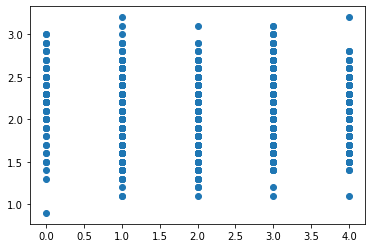

In [43]:
knn_predict=knn_reg.predict(X_test)
plt.scatter(y_test,knn_predict)


# print the final csv file out

In [ ]:

# df.sort_values(['rating'], ascending=False, inplace=True)
# df.to_csv('drugLib_processed3.csv', index=False)



In [ ]:
# import os
# os.stat('drugLib_processed3.csv').st_size
# print(df.info())

In [ ]:
# df = pd.read_csv('drugLib_processed3.csv')
# df.head()